# Get stuff imported

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


mnist = tf.keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankleboot"]
type(y_train_full)

numpy.ndarray

***60,000 images, each 28 by 28 pixels***

# Make a validation set

In [ ]:
x_valid, x_train = x_train_full[:5000] / 255, x_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
print(class_names[y_train[0]], "\n") # Class names is basically like a map
y_test

Coat 



array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

# Build the model

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=[28,28]),
  tf.keras.layers.Dense(256, activation="relu")                             ,
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model.summary()
# To calc the number of parameters:
#   Example with dense_layer 3:
#     784*300 + 300 bias = 235500

# To get weights and biases for a certain layer
weights, biases = model.layers[1].get_weights()
weights.shape, biases.shape

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


((784, 256), (256,))

# Compile the model


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", # Use scc when outputs are mutually exclusive like in this case and digits MNIST
              optimizer=tf.keras.optimizers.SGD(lr=0.03),
              metrics=["accuracy"])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# Fit the model

In [ ]:
history = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6085 - accuracy: 0.7839 - val_loss: 0.4654 - val_accuracy: 0.8358
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4160 - accuracy: 0.8493 - val_loss: 0.3846 - val_accuracy: 0.8562
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3698 - accuracy: 0.8641 - val_loss: 0.3583 - val_accuracy: 0.8652
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3444 - accuracy: 0.8743 - val_loss: 0.3300 - val_accuracy: 0.8830
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3235 - accuracy: 0.8817 - val_loss: 0.3172 - val_accuracy: 0.8840
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3054 - accuracy: 0.8865 - val_loss: 0.3764 - val_accuracy: 0.8568
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2918 - accuracy: 0.8915 - val_loss: 0.3077 - val_accuracy:

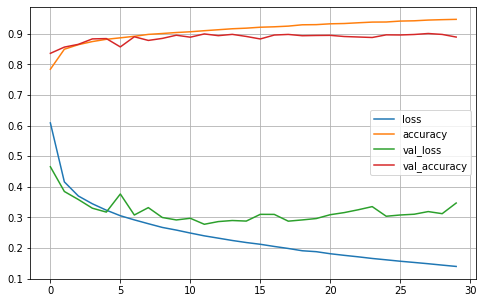

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.show()

# Evaluate the model on the test set

In [ ]:
model.evaluate(x_test, y_test)
model.save("my_model_A")

313/313 [==============================] - 1s 2ms/step - loss: 79.1414 - accuracy: 0.8258


[79.14141082763672, 0.8258000016212463]

# Use model to predict

In [ ]:
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba

# There are 3 rows for the 3 tests and the non-zero cells represents the classified answer.

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = model.predict_classes(x_new)
#np.array(class_names)[y_pred]

NameError: ignored